In [ ]:
# import necessary basic libraries
import numpy as np # Numerical computing library
import pandas as pd # Data manipulation and analysis library
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Statistical data visualization library built on Matplotlib

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the purchase behavior dataset into a Pandas DataFrame
df_purchase = pd.read_csv('/content/QVI_purchase_behaviour.csv')

# Display the first five rows of the DataFrame
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Count and print the number of duplicate rows in the DataFrame
df_purchase.duplicated().sum()

np.int64(0)

In [ ]:
# Load the transaction dataset into a Pandas DataFrame
df_transaction = pd.read_excel('/content/QVI_transaction_data.xlsx')

# Display the first five rows of the DataFrame
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Display information about the DataFrame, including data types, non-null counts, and memory usage
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
# Count and print the number of duplicate rows in the DataFrame
df_transaction.duplicated().sum()

np.int64(1)

In [ ]:
# View duplicate rows
df_transaction[df_transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [ ]:
# Remove duplicate rows from the DataFrame and update it in place
df_transaction.drop_duplicates(inplace=True)

In [ ]:
# Verify again after dropping duplicate rows
df_transaction.duplicated().sum()

np.int64(0)

In [ ]:
# Cleaning 'PROD_NAME' column:
# - Replaces multiple spaces with a single space using regex ('\s+').
# - Strips leading and trailing spaces.
df_transaction['PROD_NAME'] = df_transaction['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
# Display the first 10 unique product names after cleaning
df_transaction['PROD_NAME'].unique()[:10]

array(['Natural Chip Compny SeaSalt175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour Cream&Chives 210G'], dtype=object)

In [ ]:
# Converting 'DATE' column from Excel serial number format to a proper datetime format.
# - `origin='1899-12-30'`: This is the base date for Excel's serial format.
# - `unit='D'`: Interprets the numeric values as days since the origin.
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

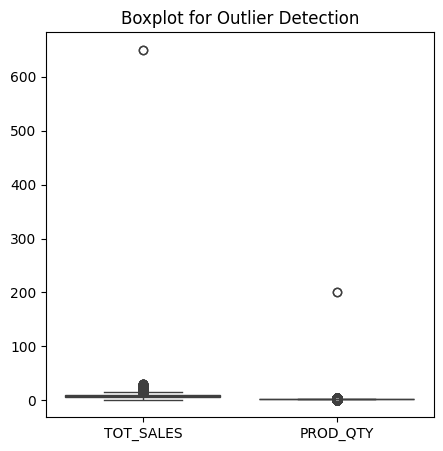

In [ ]:
# Creating a boxplot for outlier detection in 'TOT_SALES' and 'PROD_QTY'
plt.figure(figsize=(5, 5)) # Setting the figure size for better visualization
sns.boxplot(data=df_transaction[['TOT_SALES', 'PROD_QTY']])  # Creating a boxplot
plt.title("Boxplot for Outlier Detection") # Adding a title to the plot
plt.show() # Displaying the plot

In [ ]:
# Outlier detection and removal for 'TOT_SALES' using the IQR method
Q1 = df_transaction['TOT_SALES'].quantile(0.25) # First quartile (25th percentile)
Q3 = df_transaction['TOT_SALES'].quantile(0.75) # Third quartile (75th percentile)
IQR = Q3 - Q1 # Interquartile range

# Defining lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR # Lower fence
upper_bound = Q3 + 1.5 * IQR # Upper fence

# Clipping values to remove extreme outliers
df_transaction['TOT_SALES'] = df_transaction['TOT_SALES'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
# Outlier detection and removal for 'PROD_QTY' using the IQR method
Q1 = df_transaction['PROD_QTY'].quantile(0.25) # First quartile (25th percentile)
Q3 = df_transaction['PROD_QTY'].quantile(0.75) # Third quartile (75th percentile)
IQR = Q3 - Q1 # Interquartile range

# Defining lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR # Lower fence
upper_bound = Q3 + 1.5 * IQR # Upper fence

# Clipping values to remove extreme outliers
df_transaction['PROD_QTY'] = df_transaction['PROD_QTY'].clip(lower=lower_bound, upper=upper_bound)

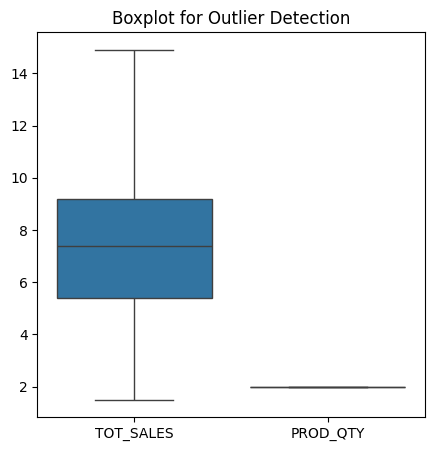

In [ ]:
# Creating a boxplot after outlier removal
plt.figure(figsize=(5, 5)) # Setting the figure size for better visualization
sns.boxplot(data=df_transaction[['TOT_SALES', 'PROD_QTY']])  # Creating a boxplot
plt.title("Boxplot for Outlier Detection") # Adding a title to the plot
plt.show() # Displaying the plot

Feature Extraction

In [ ]:
# Extracting the pack size (e.g., '250g') from the 'PROD_NAME' column
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract(r'(\d+g)')

In [ ]:
# Extracting the brand name by capturing everything before the pack size in 'PROD_NAME'
df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].str.extract(r'^(.*?)\s*\d+g')

In [ ]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,175g,CCs Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,175g,Smiths Chip Thinly S/Cream&Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,150g,Kettle Tortilla ChpsHny&Jlpno Chili


Understanding Data Distribution

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
 8   PACK_SIZE       258771 non-null  object        
 9   BRAND_NAME      258771 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [ ]:
# Dropping rows where either 'PACK_SIZE' or 'BRAND_NAME' is missing (NaN values)
df_transaction.dropna(subset=['PACK_SIZE', 'BRAND_NAME'], inplace=True)

In [ ]:
# Generating summary statistics for numerical columns in the dataframe
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,258771,258771.000000,2.587710e+05,2.587710e+05,258771.000000,258771.0,258771.000000
mean,2018-12-30 01:50:29.639333888,135.115550,1.355926e+05,1.351963e+05,56.798447,2.0,7.315453
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,2.0,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002400e+04,6.762350e+04,28.000000,2.0,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303790e+05,1.352330e+05,57.000000,2.0,7.400000
75%,2019-03-31 00:00:00,203.000000,2.031100e+05,2.027555e+05,86.000000,2.0,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,2.0,14.900000
std,NaN,76.785774,8.066814e+04,7.813836e+04,33.165552,0.0,2.493919


## Key Insights from Summary Statistics
- **DATE:** Data spans a full year (July 2018 - June 2019).
- **STORE_NBR:** 272 unique stores, well-distributed sales.
- **LYLTY_CARD_NBR:** Large customer base, but many have lower transactions.
- **TXN_ID:** High transaction volume.
- **PROD_NBR:** 114 unique products.
- **PROD_QTY:** Most transactions involve exactly 2 units.
- **TOT_SALES:** Customers typically spend between $5.40 and $9.20 per transaction.


array([[<Axes: title={'center': 'DATE'}>,
        <Axes: title={'center': 'STORE_NBR'}>,
        <Axes: title={'center': 'LYLTY_CARD_NBR'}>],
       [<Axes: title={'center': 'TXN_ID'}>,
        <Axes: title={'center': 'PROD_NBR'}>,
        <Axes: title={'center': 'PROD_QTY'}>],
       [<Axes: title={'center': 'TOT_SALES'}>, <Axes: >, <Axes: >]],
      dtype=object)

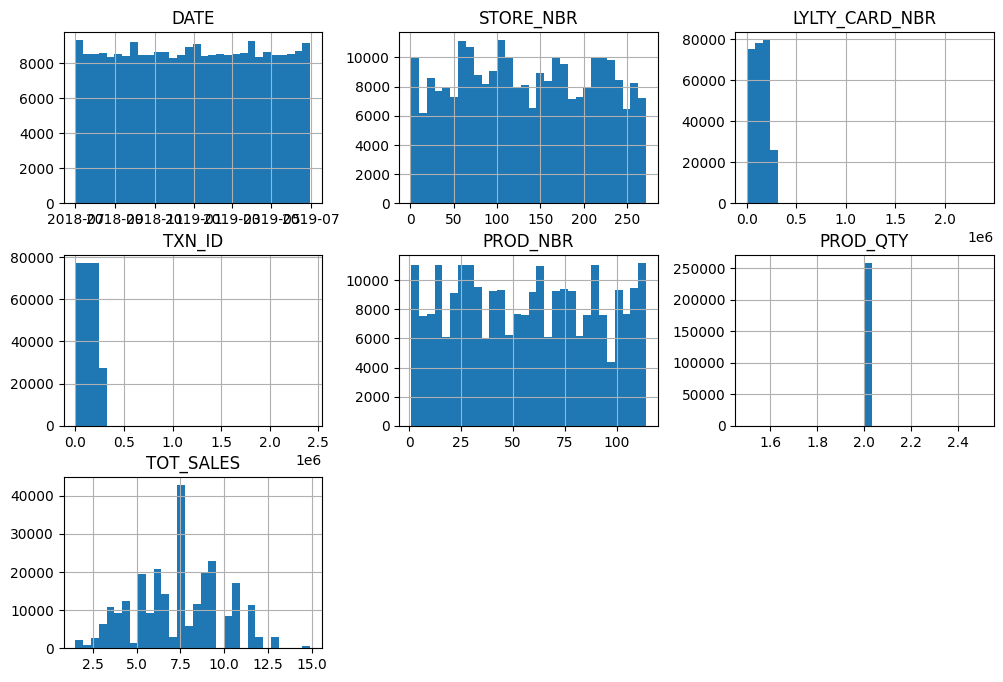

In [ ]:
# Creating histograms for numerical columns to visualize distributions
df_transaction.hist(figsize=(12, 8), bins=30)

## Insights from Histograms
- **DATE:** Evenly distributed, no missing data.
- **STORE_NBR:** Well-distributed sales across stores.
- **LYLTY_CARD_NBR:** A few customers have significantly higher transactions.
- **PROD_QTY:** Most transactions involve exactly 2 items.


Customer Segmentation & Analysis

In [ ]:
# Define the reference date as the most recent transaction date in the dataset
reference_date = df_transaction['DATE'].max()

# Compute RFM metrics by grouping transactions by 'LYLTY_CARD_NBR' (customer ID)
rfm = df_transaction.groupby('LYLTY_CARD_NBR').agg({
    'DATE': lambda x: (reference_date - x.max()).days,  # Recency: Days since last purchase
    'TXN_ID': 'count',  # Frequency: Total number of transactions
    'TOT_SALES': 'sum'   # Monetary: Total amount spent
})

# Rename columns for better readability
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Assign RFM scores (1 to 5) using quantiles
# Recency: Lower values are better (recent purchases), so scoring is reversed
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency: Higher values are better (more transactions), so scoring follows natural order
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetary: Higher values are better (higher spending), so scoring follows natural order
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Create a combined RFM score (concatenating R, F, and M scores as a string)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display the first few rows of the RFM DataFrame
print(rfm.head())


                Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
LYLTY_CARD_NBR                                                                
1000                256          1       6.0       1       1       1       111
1002                287          1       2.7       1       1       1       111
1003                114          1       3.0       2       1       1       211
1004                240          1       1.9       1       1       1       111
1005                184          1       2.8       2       1       1       211


**RFM Analysis (Recency, Frequency, Monetary)**

Customers were segmented based on how recently, how often, and how much they
spent.

Higher RFM scores indicate loyal and valuable customers, while lower scores suggest inactive or lost customers.

Most customers had low frequency and low spending, suggesting one-time or infrequent buyers.

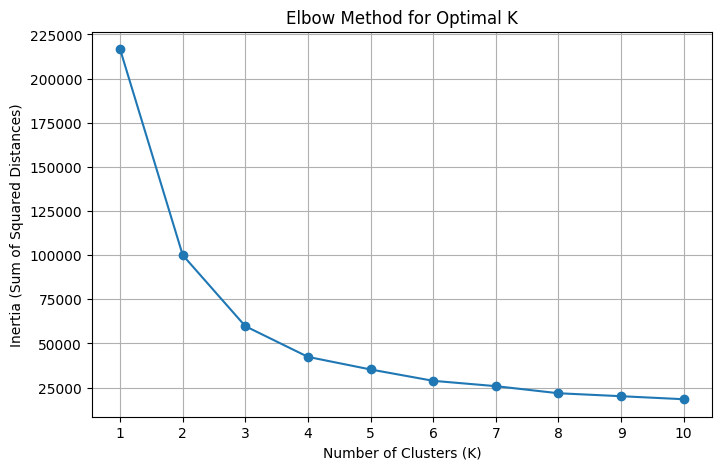

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the RFM dataset (assuming RFM scores have been computed already)
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Step 1: Standardizing the Data
# K-Means works best with normalized data, so we scale RFM values to have mean=0 and variance=1
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Step 2: Finding the Optimal Number of Clusters using the Elbow Method
inertia = []  # List to store inertia values (sum of squared distances)
K = range(1, 11)  # Testing K values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize K-Means with 'k' clusters
    kmeans.fit(rfm_scaled)  # Fit the model to the scaled RFM data
    inertia.append(kmeans.inertia_)  # Store the inertia value

# Step 3: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-')  # Plot K vs Inertia
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K)  # Show integer values for K
plt.grid(True)  # Add grid for better visualization
plt.show()



                Recency  Frequency  Monetary   Customer_Segment
LYLTY_CARD_NBR                                                 
1000                256          1       6.0     Best Customers
1002                287          1       2.7     Best Customers
1003                114          1       3.0  At Risk Customers
1004                240          1       1.9     Best Customers
1005                184          1       2.8     Best Customers


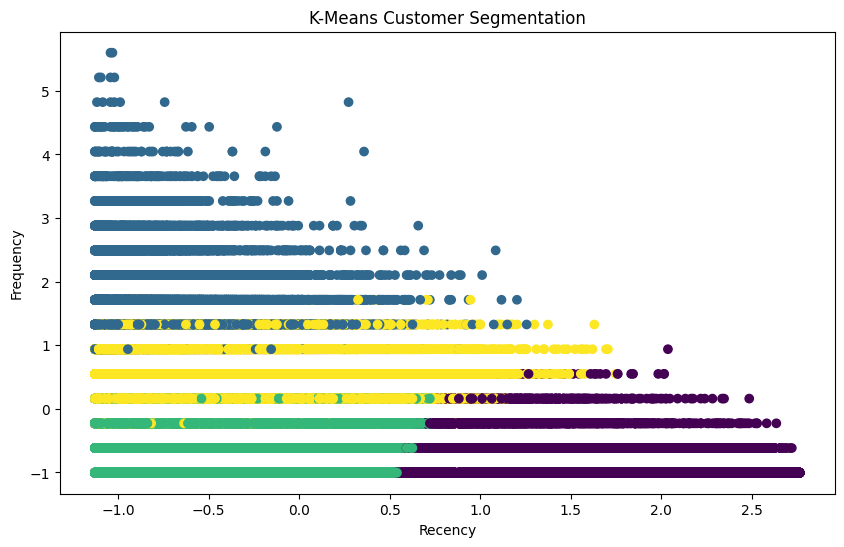

In [ ]:
# Step 3: Applying K-Means Clustering (Choose K Based on the Elbow Method)
optimal_k = 4  # Chosen based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Assign cluster labels to each customer based on their RFM scores
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)


# Step 4: Mapping Clusters to Customer Segments
# Manually assigning meaningful labels to each cluster
segment_map = {
    0: "Best Customers",
    1: "Loyal Customers",
    2: "At Risk Customers",
    3: "Lost Customers"
}

# Mapping numerical cluster labels to human-readable customer segments
rfm_data['Customer_Segment'] = rfm_data['Cluster'].map(segment_map)

# Step 5: Viewing the Segments
# Display a few rows of the dataset with customer segments
print(rfm_data[['Recency', 'Frequency', 'Monetary', 'Customer_Segment']].head())

# Optional: Visualizing Clusters
plt.figure(figsize=(10, 6))
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("K-Means Customer Segmentation")
plt.show()

**K-Means Clustering for Customer Segmentation**

K-Means identified distinct customer groups based on RFM scores.

The scatter plot of Recency vs. Frequency revealed clear clusters.

Different segments show variation in engagement and spending behavior.

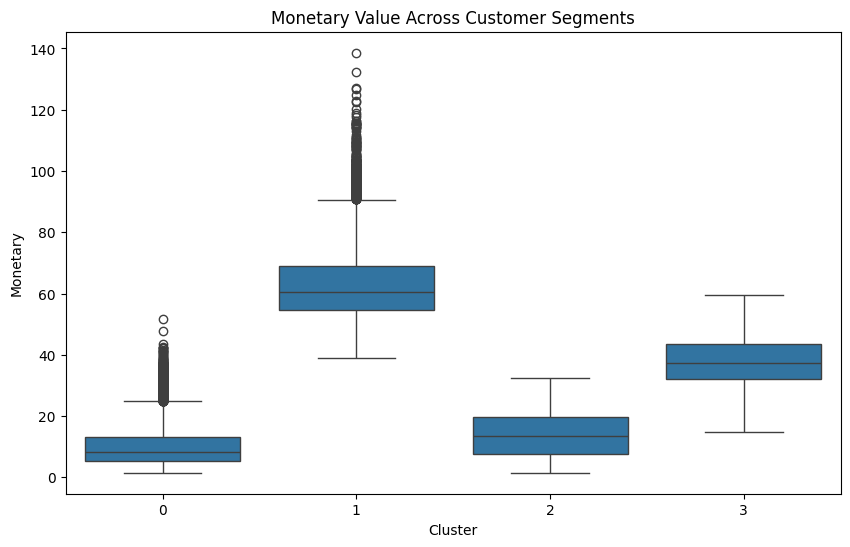

In [ ]:
import seaborn as sns

# Step: Visualizing Monetary Value Across Customer Segments
plt.figure(figsize=(10, 6))  # Set figure size

# Creating a boxplot to show the distribution of 'Monetary' values across different clusters
sns.boxplot(x=rfm_data['Cluster'], y=rfm_data['Monetary'])

# Adding a title to the plot
plt.title('Monetary Value Across Customer Segments')

# Displaying the plot
plt.show()


**Boxplot Analysis of Customer Segments**

The Monetary Value Boxplot highlights spending differences across clusters.

Cluster 1 has the highest-spending, high-value customers.

Cluster 3 represents moderate spenders.

Clusters 0 & 2 include low-value, potentially inactive customers

** Business Takeaways & Recommendations**

 High-value customers (Cluster 1) → Retain with loyalty programs.

 Moderate spenders (Cluster 3) → Encourage with personalized offers.

 At-risk/lost customers (Clusters 0 & 2) → Re-engagement campaigns needed.

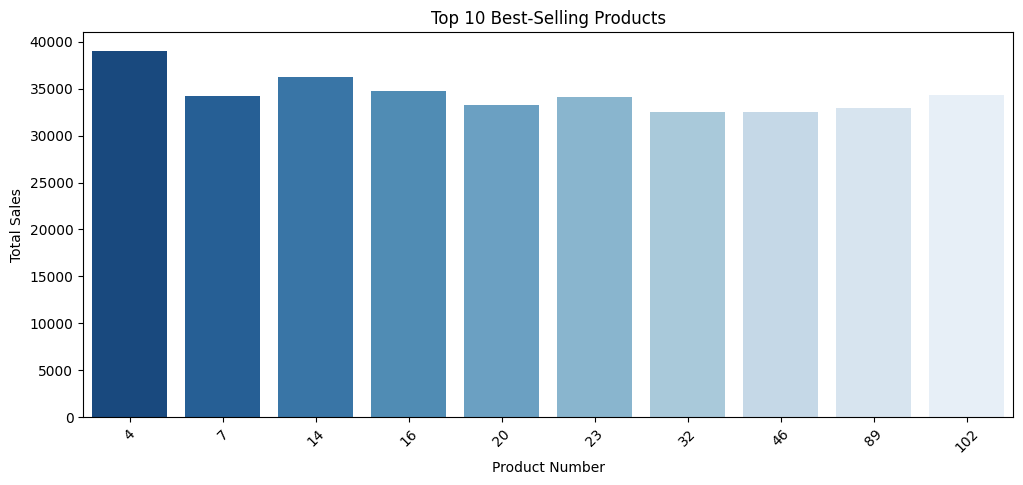

In [ ]:
# Step 1: Calculate Total Sales per Product
product_sales = df_transaction.groupby('PROD_NBR')['TOT_SALES'].sum().sort_values(ascending=False)

# Step 2: Identify Most Popular Products (based on transaction count)
popular_products = df_transaction['PROD_NBR'].value_counts().head(10)

# Step 3: Analyze Sales Trend Over Time
# Ensure the 'DATE' column is in datetime format for proper time-series analysis
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'])


# Aggregate total sales per date to observe the trend over time
sales_trend = df_transaction.groupby('DATE')['TOT_SALES'].sum()

# Step 4: Visualize Top 10 Best-Selling Products
plt.figure(figsize=(12, 5))  # Set figure size

# Create a bar plot for the top 10 selling products
sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10], palette="Blues_r")

# Adding labels and title
plt.xlabel("Product Number")
plt.ylabel("Total Sales")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

***Top 10 Best-Selling Products (Total Sales)***

Product 4 is the highest-selling product, followed by products 1, 14, 16, and 20.

These products contribute significantly to overall revenue.

The sales distribution among the top 10 products is relatively balanced, with no extreme outlier.

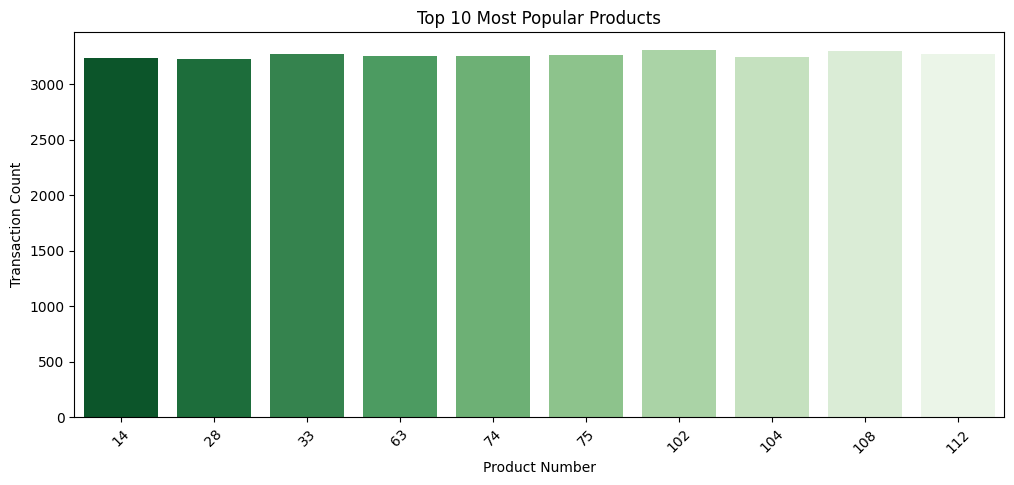

In [ ]:
# Step: Plot Most Popular Products (by transaction count)
plt.figure(figsize=(12, 5))  # Set figure size

# Create a bar plot for the top 10 most frequently purchased products
sns.barplot(x=popular_products.index, y=popular_products.values, palette="Greens_r")

# Adding labels and title
plt.xlabel("Product Number")  # Label for x-axis
plt.ylabel("Transaction Count")  # Label for y-axis
plt.title("Top 10 Most Popular Products")  # Chart title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

***Top 10 Most Popular Products (Transaction Count)***

Product 14, 28, 33, and 63 appear most frequently in transactions.

This indicates that these products are frequently purchased, even if their total sales value might not be the highest.

Some products have high popularity (frequent purchases) but may have lower revenue, suggesting lower pricing or smaller packaging.

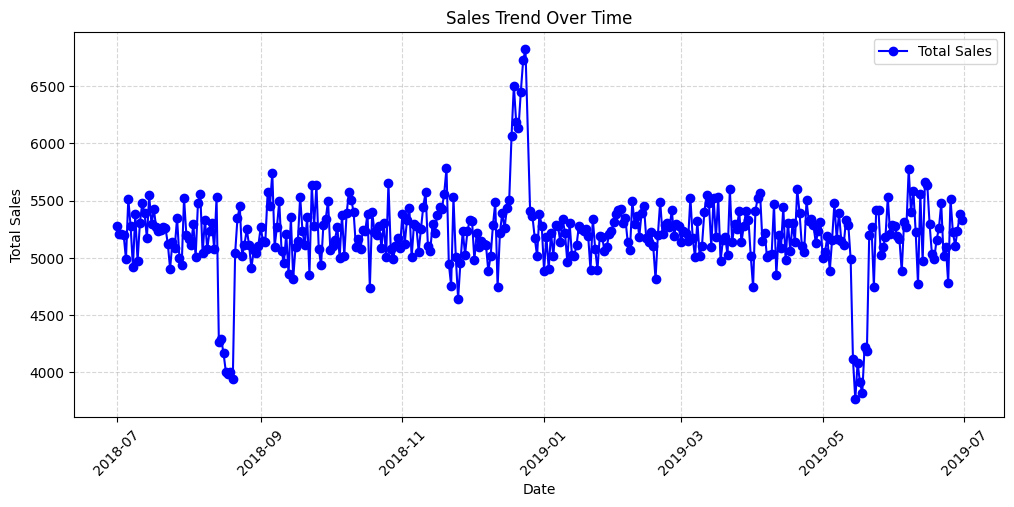

In [ ]:
# Step: Plot Sales Trend Over Time
plt.figure(figsize=(12, 5))  # Set figure size

# Create a line plot for sales trend over time
plt.plot(sales_trend, marker='o', linestyle='-', color='b', label="Total Sales")

# Adding labels and title
plt.xlabel("Date")  # Label for x-axis
plt.ylabel("Total Sales")  # Label for y-axis
plt.title("Sales Trend Over Time")  # Chart title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.5)  # Add a light grid for better visualization
plt.legend()  # Show legend

# Display the plot
plt.show()

***Sales Trend Over Time***

Sales are relatively stable but show periodic spikes and dips.

There is a significant sales spike around January 2019, indicating possible seasonal or promotional effects.

Sales dips at specific points might indicate supply chain issues, holidays, or customer behavior changes.

In [ ]:
# Step: Calculate total sales per transaction
avg_spending = df_transaction.groupby('TXN_ID')['TOT_SALES'].sum().mean()

# Display the result with formatting for better readability
print(f"Average Spending per Transaction: ${avg_spending:.2f}")

Average Spending per Transaction: $7.36


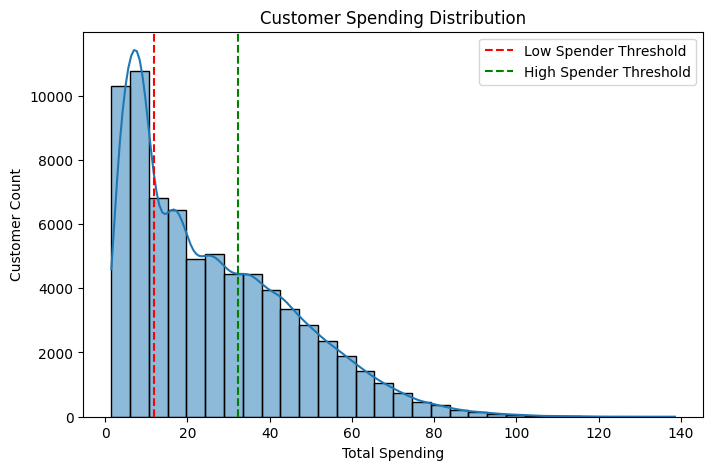

,count
Spending_Category,
High Spender,24502
Low Spender,23951
Medium Spender,23750


In [ ]:
# Segment Customers Based on Spending Habits

# Group by customer and calculate total spending
customer_spending = df_transaction.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()

# Define spending categories using percentiles
low_threshold = np.percentile(customer_spending["TOT_SALES"], 33)
high_threshold = np.percentile(customer_spending["TOT_SALES"], 66)

# Categorize customers
def categorize_spending(value):
    if value <= low_threshold:
        return "Low Spender"
    elif value <= high_threshold:
        return "Medium Spender"
    else:
        return "High Spender"

customer_spending["Spending_Category"] = customer_spending["TOT_SALES"].apply(categorize_spending)

# Plot spending distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_spending["TOT_SALES"], bins=30, kde=True)
plt.axvline(low_threshold, color='r', linestyle='dashed', label='Low Spender Threshold')
plt.axvline(high_threshold, color='g', linestyle='dashed', label='High Spender Threshold')
plt.xlabel("Total Spending")
plt.ylabel("Customer Count")
plt.title("Customer Spending Distribution")
plt.legend()
plt.show()

# Display summary
customer_spending["Spending_Category"].value_counts()


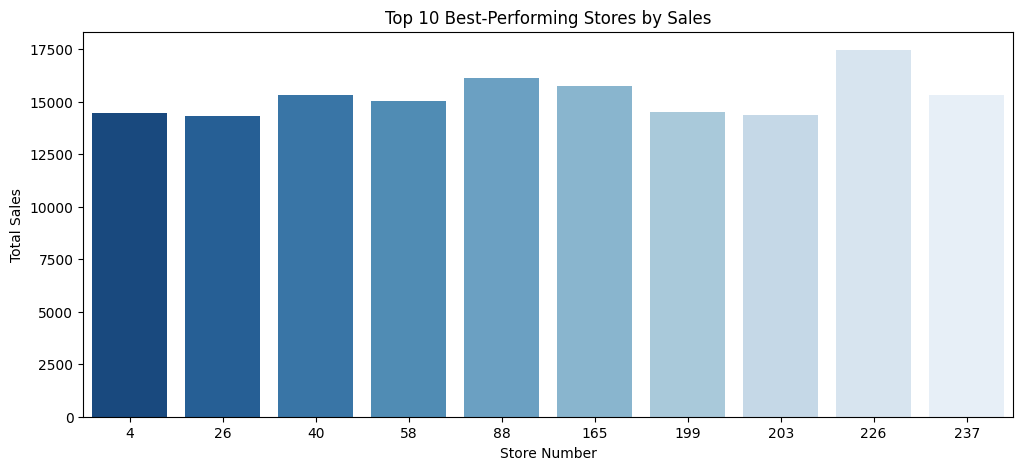

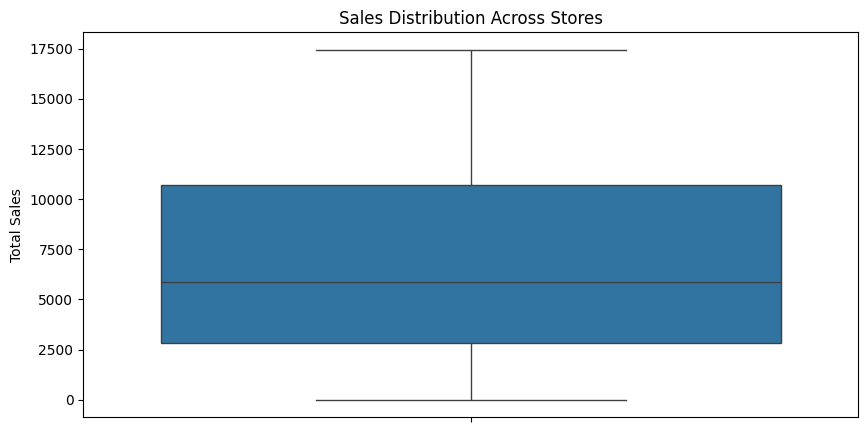

In [ ]:
# Compare Spending Across Different Stores/Regions

# Group by store and calculate total sales
store_sales = df_transaction.groupby("STORE_NBR")["TOT_SALES"].sum().reset_index()

# Sort by total sales
store_sales = store_sales.sort_values(by="TOT_SALES", ascending=False)

# Plot top 10 stores by sales
plt.figure(figsize=(12, 5))
sns.barplot(data=store_sales.head(10), x="STORE_NBR", y="TOT_SALES", palette="Blues_r")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.title("Top 10 Best-Performing Stores by Sales")
plt.show()

# Boxplot to check sales distribution across all stores
plt.figure(figsize=(10, 5))
sns.boxplot(data=store_sales, y="TOT_SALES")
plt.ylabel("Total Sales")
plt.title("Sales Distribution Across Stores")
plt.show()


*** Insights from Store Sales Analysis:***

1️⃣ Store 226 is the highest revenue-generating store among the top 10.

2️⃣ Other top-performing stores include Store 40, Store 88, and Store 165.

3️⃣ Sales are relatively balanced across the top 10 stores, meaning no single
store dominates significantly.

4️⃣ No major outliers in total sales across stores, indicating fairly uniform performance.



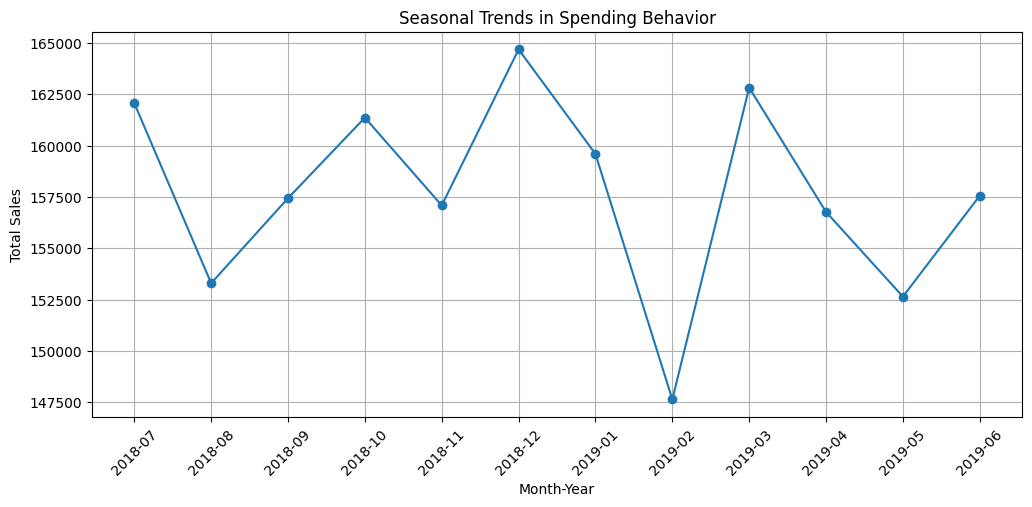

In [ ]:
# Analyze Seasonal Trends in Spending Behavior

# Aggregate sales by month
df_transaction['Month_Year'] = df_transaction['DATE'].dt.to_period('M')
monthly_sales = df_transaction.groupby('Month_Year')['TOT_SALES'].sum().reset_index()

# Convert period to datetime for plotting
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['Month_Year'], monthly_sales['TOT_SALES'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Seasonal Trends in Spending Behavior")
plt.grid(True)
plt.show()


***Observations from the seasonal trend:***

 Spikes in December & March → Likely holiday or promotional periods.

 Drop in February → Could indicate a seasonal low in spending.

 Overall fluctuation → Shows recurring patterns over months.

 ***Merge Transaction and Customer Data***

In [ ]:
# Merge transaction data with customer data
df_merged = df_transaction.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

# Check the merged dataset
df_merged.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,Month_Year,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Compny SeaSalt,2018-10,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,175g,CCs Nacho Cheese,2019-05,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths Crinkle Cut Chips Chicken,2019-05,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,175g,Smiths Chip Thinly S/Cream&Onion,2018-08,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,150g,Kettle Tortilla ChpsHny&Jlpno Chili,2018-08,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258771 entries, 0 to 258770
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              258771 non-null  datetime64[ns]
 1   STORE_NBR         258771 non-null  int64         
 2   LYLTY_CARD_NBR    258771 non-null  int64         
 3   TXN_ID            258771 non-null  int64         
 4   PROD_NBR          258771 non-null  int64         
 5   PROD_NAME         258771 non-null  object        
 6   PROD_QTY          258771 non-null  int64         
 7   TOT_SALES         258771 non-null  float64       
 8   PACK_SIZE         258771 non-null  object        
 9   BRAND_NAME        258771 non-null  object        
 10  Month_Year        258771 non-null  period[M]     
 11  LIFESTAGE         258771 non-null  object        
 12  PREMIUM_CUSTOMER  258771 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5), peri

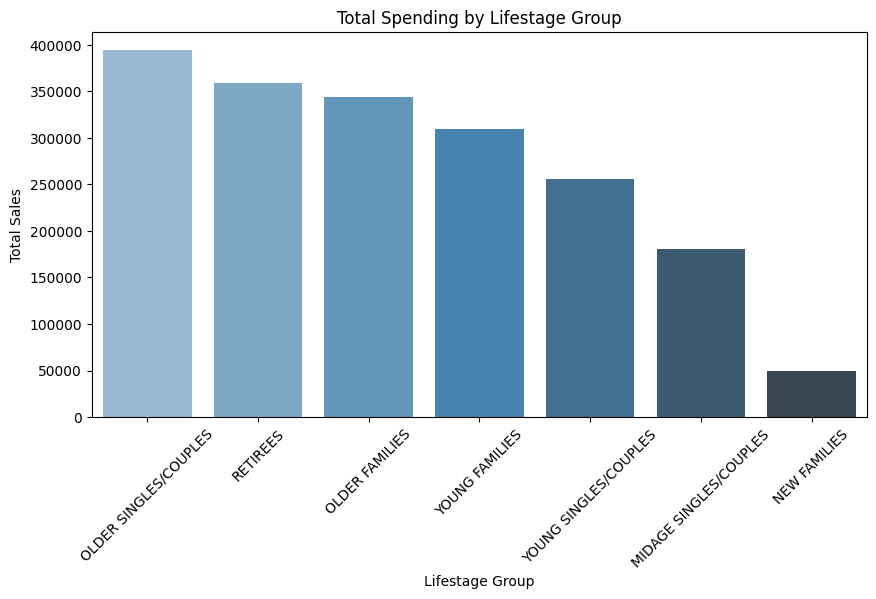

In [ ]:
# Find Which LIFESTAGE Group Spends the Most

# Group by LIFESTAGE and sum total sales
lifestage_spending = df_merged.groupby("LIFESTAGE")["TOT_SALES"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=lifestage_spending.index, y=lifestage_spending.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel("Lifestage Group")
plt.ylabel("Total Sales")
plt.title("Total Spending by Lifestage Group")
plt.show()


***Older Singles/Couples spend the most, followed by Retirees and Older Families.***

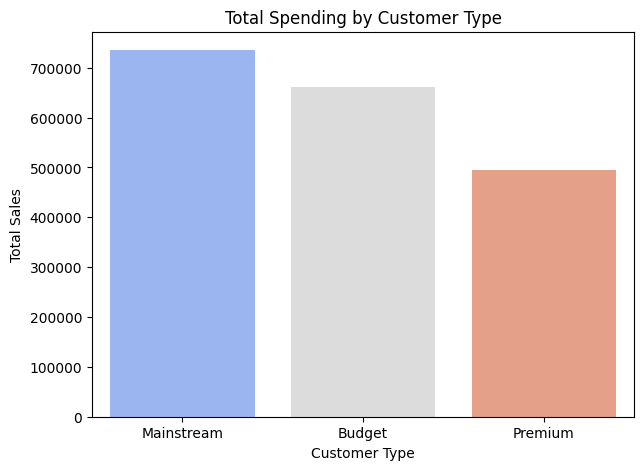

In [ ]:
 #Compare Spending Across Premium, Mainstream, and Budget Customers

 # Group by PREMIUM_CUSTOMER and sum total sales
premium_spending = df_merged.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=premium_spending.index, y=premium_spending.values, palette="coolwarm")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.title("Total Spending by Customer Type")
plt.show()


***This shows that Mainstream customers spend the most, followed by Budget customers, and then Premium customers.***

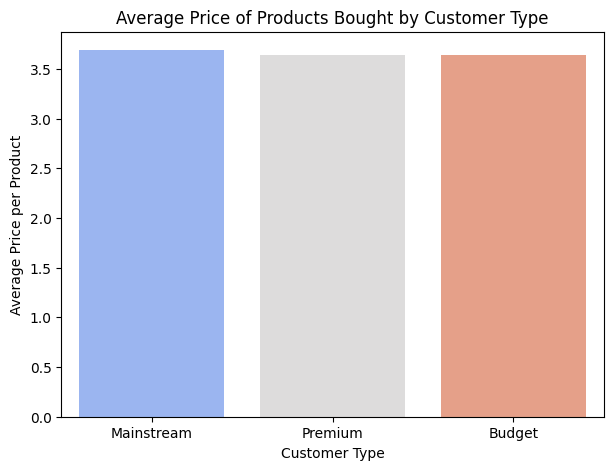

In [ ]:
# Do Premium Customers Buy More Expensive Products?

# Calculate average price per product
df_merged["AVG_PRICE"] = df_merged["TOT_SALES"] / df_merged["PROD_QTY"]

# Group by customer type and get the average price
premium_avg_price = df_merged.groupby("PREMIUM_CUSTOMER")["AVG_PRICE"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=premium_avg_price.index, y=premium_avg_price.values, palette="coolwarm")
plt.xlabel("Customer Type")
plt.ylabel("Average Price per Product")
plt.title("Average Price of Products Bought by Customer Type")
plt.show()


***The average price per product is almost the same across all customer types, meaning Premium customers do not necessarily buy more expensive products than Budget or Mainstream customers.***

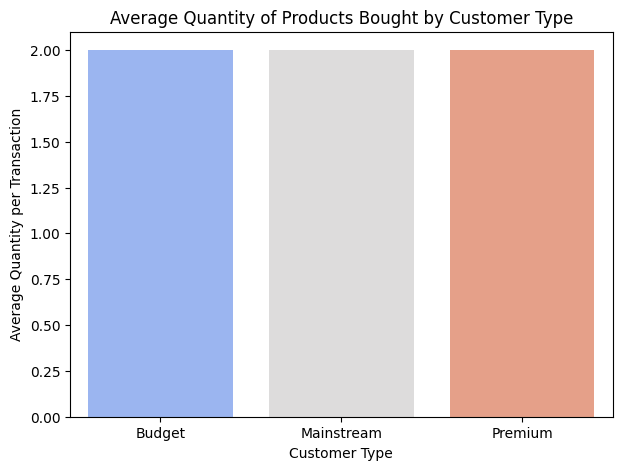

In [ ]:
# Do Certain Customer Segments Buy in Larger Quantities?

# Group by customer type and calculate the average quantity per transaction
avg_qty_per_txn = df_merged.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=avg_qty_per_txn.index, y=avg_qty_per_txn.values, palette="coolwarm")
plt.xlabel("Customer Type")
plt.ylabel("Average Quantity per Transaction")
plt.title("Average Quantity of Products Bought by Customer Type")
plt.show()


***The average quantity per transaction is nearly identical across all customer types, meaning no segment is buying significantly more products per purchase.***

Key Insights So Far:
Older Singles/Couples and Retirees spend the most.

Mainstream customers have the highest total spending.

Premium customers don't necessarily buy more expensive products.

All customer types buy similar quantities per transaction.

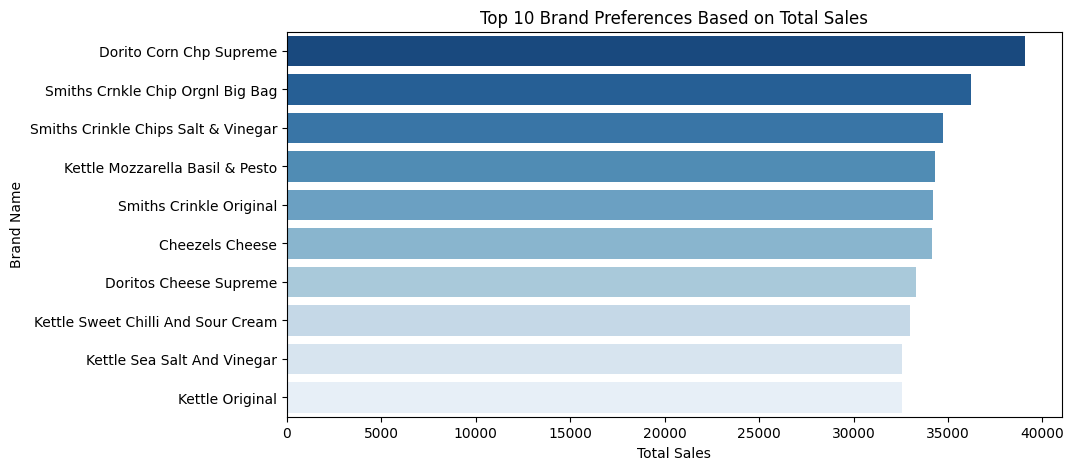

In [ ]:
# Product preferences across different customer segments.

# Aggregate total sales by Brand Name
brand_sales = df_merged.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()

# Sort brands by total sales in descending order
top_brands = brand_sales.sort_values(by='TOT_SALES', ascending=False).head(10)

# Plot the top 10 brands
plt.figure(figsize=(10, 5))
sns.barplot(data=top_brands, x='TOT_SALES', y='BRAND_NAME', palette='Blues_r')
plt.xlabel('Total Sales')
plt.ylabel('Brand Name')
plt.title('Top 10 Brand Preferences Based on Total Sales')
plt.show()


***Dorito Corn Chip Supreme is the top-selling brand, followed by Smiths Crinkle Chips and Kettle Mozzarella Basil & Pesto.***

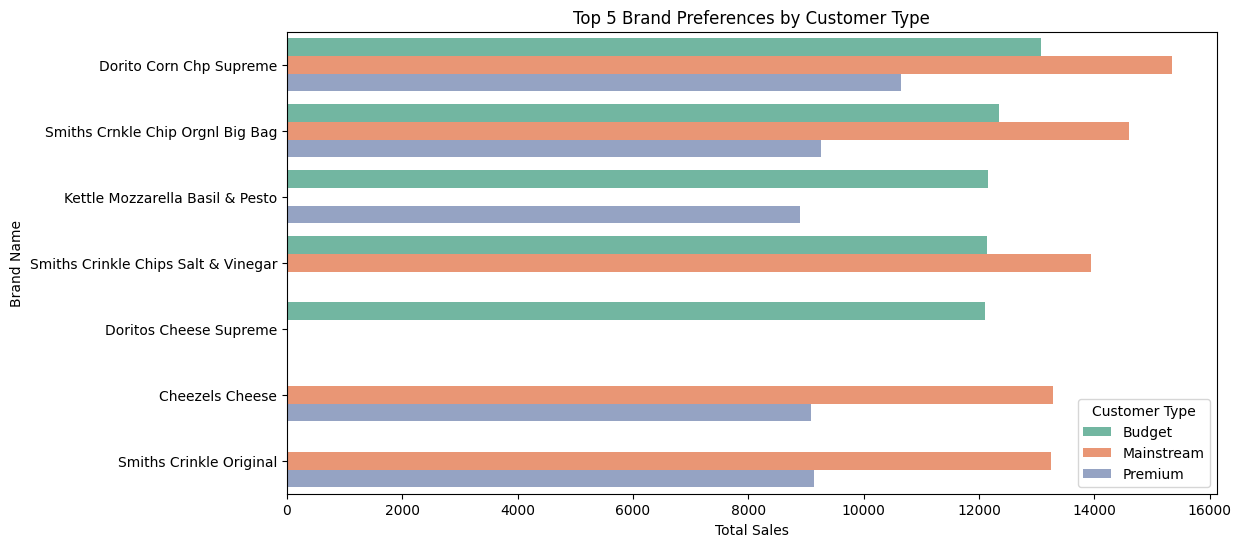

In [ ]:

# Grouping by customer type and brand, then summing up total sales
brand_customer_sales = df_merged.groupby(["PREMIUM_CUSTOMER", "BRAND_NAME"])["TOT_SALES"].sum().reset_index()

# Getting the top 5 brands per customer type
top_brands_per_customer = brand_customer_sales.groupby("PREMIUM_CUSTOMER").apply(lambda x: x.nlargest(5, "TOT_SALES")).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands_per_customer, x="TOT_SALES", y="BRAND_NAME", hue="PREMIUM_CUSTOMER", palette="Set2")
plt.xlabel("Total Sales")
plt.ylabel("Brand Name")
plt.title("Top 5 Brand Preferences by Customer Type")
plt.legend(title="Customer Type")
plt.show()


Mainstream customers seem to have the highest total sales across most brands.

Budget customers also contribute significantly to top brands like Doritos and Smiths.

Premium customers have lower sales but still prefer brands like Kettle and Smiths.

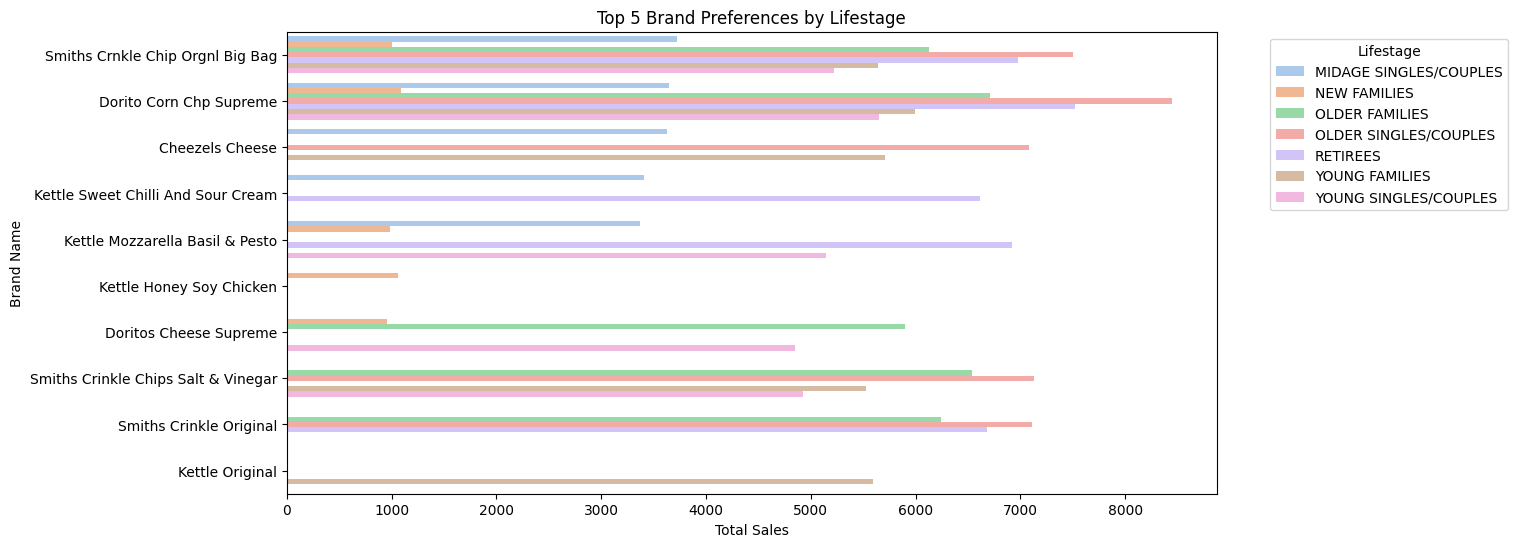

In [ ]:
# Brand Preferences by Lifestage

# Grouping by lifestage and brand, then summing up total sales
brand_lifestage_sales = df_merged.groupby(["LIFESTAGE", "BRAND_NAME"])["TOT_SALES"].sum().reset_index()

# Getting the top 5 brands per lifestage
top_brands_per_lifestage = brand_lifestage_sales.groupby("LIFESTAGE").apply(lambda x: x.nlargest(5, "TOT_SALES")).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands_per_lifestage, x="TOT_SALES", y="BRAND_NAME", hue="LIFESTAGE", palette="pastel")
plt.xlabel("Total Sales")
plt.ylabel("Brand Name")
plt.title("Top 5 Brand Preferences by Lifestage")
plt.legend(title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


**Older families and young singles/couples seem to prefer brands like Smiths Crinkle Chips and Doritos.**

**Retirees lean towards Kettle-branded products.**

**Young families also contribute significantly to Smiths and Cheezels sales.**

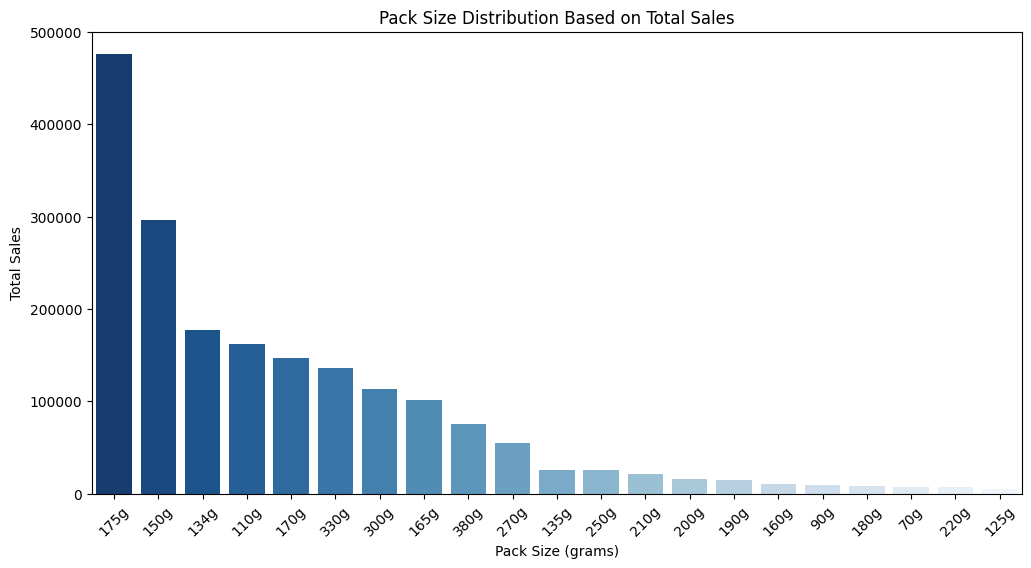

In [ ]:
# Pack Size Distribution Analysis

# Grouping by pack size and summing total sales
pack_size_sales = df_merged.groupby("PACK_SIZE")["TOT_SALES"].sum().reset_index()

# Sorting by total sales
pack_size_sales = pack_size_sales.sort_values("TOT_SALES", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pack_size_sales, x="PACK_SIZE", y="TOT_SALES", palette="Blues_r")
plt.xlabel("Pack Size (grams)")
plt.ylabel("Total Sales")
plt.title("Pack Size Distribution Based on Total Sales")
plt.xticks(rotation=45)
plt.show()


Medium-sized packs (175g, 150g, 134g, 110g, 170g, etc.) dominate sales, suggesting that customers prefer standard snack-sized options.

Larger pack sizes (330g, 300g, 380g) also sell well, possibly for families or bulk buyers.

Smaller packs (below 100g) have lower sales, indicating that they might not be as popular.

### **Summary of Findings & Recommendations**  

#### **1. Brand Preferences by Customer Type**  
- **Mainstream customers** have the highest total sales across all brands.  
- **Budget customers** contribute significantly but slightly lower than mainstream.  
- **Premium customers** have the lowest total sales, suggesting a niche market.  
🔹 *Recommendation:* Focus marketing efforts on mainstream and budget customers. Consider premium brand promotions to boost engagement.  

#### **2. Brand Preferences by Lifestage**  
- **Young Singles/Couples** and **Older Families** dominate in total sales.  
- **Retirees** and **New Families** show moderate purchasing behavior.  
- **Older Singles/Couples** and **Midage Singles/Couples** have lower sales.  
🔹 *Recommendation:* Tailor promotions for young and older families. Offer targeted discounts for midage singles to boost sales.  

#### **3. Pack Size Distribution Analysis**  
- **175g packs** have the highest sales, followed by **150g packs**.  
- Mid-sized packs (110g-170g) also perform well.  
- **Smaller packs (below 100g) and larger packs (above 300g) have lower sales.**  
🔹 *Recommendation:* Maintain higher stock for **175g and 150g packs**. Consider promotions for smaller/larger packs to increase demand.  

---

### **Final Business Recommendations**  
**Marketing:** Prioritize mainstream and budget customers. Use targeted ads for premium users.  

**Product Strategy:** Focus on **top-selling brands and pack sizes**. Introduce new flavors for high-performing segments.  

**Sales Strategy:** Adjust inventory based on **demand patterns**—more stock for 175g & 150g packs.  
